In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

### **Corrective actions dataset for time series**

#### **Corrective actions grouped by day**

In [ ]:
# Load data
df_md = pd.read_csv('/content/drive/MyDrive/Team 111 DS4A - Project/Data/medidas_correctivas_ajustada.csv', sep = ';', encoding = 'latin1')
df_md.sort_values(['AÑO_NUM', 'MES_NUM'], ascending=False).head()

,Fecha,AÑO_NUM,MES_NUM,DIA_NUM,Period,LOCALIDAD,BARRIO_HECHOS,CATEGORIA,DESCRIPCIÓN_COMPORTAMIENTO,EDAD,BARRIO_VULNERABLE
1649,2/02/2022,2022,2,2,2022-02,13. ORIENTAL,LA AURORA,Incumplimiento normatividad,Desarrollar la actividad económica sin cumplir...,37,No
1650,2/02/2022,2022,2,2,2022-02,13. ORIENTAL,LA AURORA,Incumplimiento normatividad,Desarrollar la actividad económica sin cumplir...,37,No
1651,7/02/2022,2022,2,7,2022-02,13. ORIENTAL,LA AURORA,Porte de armas,"Portar armas, elementos cortantes, punzantes o...",30,No
1652,7/02/2022,2022,2,7,2022-02,13. ORIENTAL,LA AURORA,Porte de armas,"Portar armas, elementos cortantes, punzantes o...",30,No
1653,7/02/2022,2022,2,7,2022-02,13. ORIENTAL,LA AURORA,Porte de armas,"Portar armas, elementos cortantes, punzantes o...",30,No


In [ ]:
df_md.columns = ["FECHA","AÑO","MES","DIA","PERIODO","LOCALIDAD","BARRIO","CATEGORIA","COMPORTAMIENTO","EDAD", "BARRIO_VULNERABLE"]
df_md['FECHA'] = pd.to_datetime(df_md['FECHA'], format='%d/%m/%Y') 
daily_corrective_action = df_md.groupby(['FECHA'])['COMPORTAMIENTO'].count().reset_index()
daily_corrective_action

,FECHA,COMPORTAMIENTO
0,2017-02-05,1
1,2017-02-07,9
2,2017-02-08,38
3,2017-02-09,61
4,2017-02-10,54
...,...,...
1839,2022-02-24,149
1840,2022-02-25,181
1841,2022-02-26,161
1842,2022-02-27,222


In [ ]:
daily_corrective_action.rename(columns = {'COMPORTAMIENTO':'CANTIDAD'}, inplace = True)
daily_corrective_action.head(3)

,FECHA,CANTIDAD
0,2017-02-05,1
1,2017-02-07,9
2,2017-02-08,38


In [ ]:
daily_corrective_series = pd.DataFrame()
daily_corrective_series['FECHA'] = pd.date_range(start=daily_corrective_action['FECHA'].min(), end=daily_corrective_action['FECHA'].max())
daily_corrective_series['ANO'] = daily_corrective_series['FECHA'].dt.isocalendar().year
daily_corrective_series['MES'] = daily_corrective_series['FECHA'].dt.month
daily_corrective_series['SEMANA'] = daily_corrective_series['FECHA'].dt.isocalendar().week
daily_corrective_series['DIA_SEMANA'] = daily_corrective_series['FECHA'].dt.dayofweek
daily_corrective_series['DIA_MES'] = daily_corrective_series['FECHA'].dt.day

daily_corrective_series['CANTIDAD'] = daily_corrective_series.merge(daily_corrective_action, on='FECHA', how='left')['CANTIDAD'].fillna(0)
daily_corrective_series

,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,CANTIDAD
0,2017-02-05,2017,2,5,6,5,1.0
1,2017-02-06,2017,2,6,0,6,0.0
2,2017-02-07,2017,2,6,1,7,9.0
3,2017-02-08,2017,2,6,2,8,38.0
4,2017-02-09,2017,2,6,3,9,61.0
...,...,...,...,...,...,...,...
1845,2022-02-24,2022,2,8,3,24,149.0
1846,2022-02-25,2022,2,8,4,25,181.0
1847,2022-02-26,2022,2,8,5,26,161.0
1848,2022-02-27,2022,2,8,6,27,222.0


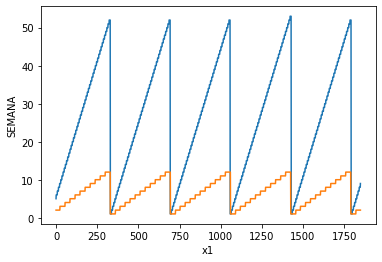

In [ ]:
temp_df = daily_corrective_series
temp_df["x1"] = daily_corrective_series.index

sns.lineplot(x='x1',
             y='SEMANA',
             data = temp_df[:])
sns.lineplot(x='x1',
             y='MES',
             data = temp_df[:])

#### **Corrective actions per neighborhood grouped by day, week and month**

In [ ]:
daily_corrective_neighborhood = df_md.pivot_table(index=["FECHA"], columns="BARRIO", values="EDAD", aggfunc="count").reset_index().sort_values('FECHA').fillna(0)
daily_corrective_neighborhood.head()

BARRIO,FECHA,12 DE OCTUBRE,13 DE JUNIO,23 DE JUNIO,ALBANIA,ALTO DE LOS PADRES,ALTOS DEL CACIQUE,ALTOS DEL KENNEDY,ALTOS DEL PROGRESO,ANTIGUA COLOMBIA,...,VENADO DE ORO,VIJAGUAL,VILLA ALICIA,VILLA FLOR,VILLA HELENA I,VILLA HELENA II,VILLA MERCEDES,VILLA ROSA,VILLA SARA,VIVEROS DE PROVENZA
0,2017-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-02-10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
daily_corrective_neighborhood_series = pd.DataFrame()
daily_corrective_neighborhood_series['FECHA'] = pd.date_range(start=daily_corrective_neighborhood['FECHA'].min(), end=daily_corrective_neighborhood['FECHA'].max())
daily_corrective_neighborhood_series['ANO'] = daily_corrective_neighborhood_series['FECHA'].dt.isocalendar().year
daily_corrective_neighborhood_series['MES'] = daily_corrective_neighborhood_series['FECHA'].dt.month
daily_corrective_neighborhood_series['SEMANA'] = daily_corrective_neighborhood_series['FECHA'].dt.isocalendar().week
daily_corrective_neighborhood_series['DIA_SEMANA'] = daily_corrective_neighborhood_series['FECHA'].dt.dayofweek
daily_corrective_neighborhood_series['DIA_MES'] = daily_corrective_neighborhood_series['FECHA'].dt.day

daily_corrective_neighborhood_series = daily_corrective_neighborhood_series.merge(daily_corrective_neighborhood, on='FECHA', how='left').fillna(0)
daily_corrective_neighborhood_series

,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,12 DE OCTUBRE,13 DE JUNIO,23 DE JUNIO,ALBANIA,...,VENADO DE ORO,VIJAGUAL,VILLA ALICIA,VILLA FLOR,VILLA HELENA I,VILLA HELENA II,VILLA MERCEDES,VILLA ROSA,VILLA SARA,VIVEROS DE PROVENZA
0,2017-02-05,2017,2,5,6,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017-02-06,2017,2,6,0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-02-07,2017,2,6,1,7,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-02-08,2017,2,6,2,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-02-09,2017,2,6,3,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2022-02-24,2022,2,8,3,24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1846,2022-02-25,2022,2,8,4,25,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1847,2022-02-26,2022,2,8,5,26,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
1848,2022-02-27,2022,2,8,6,27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([737850., 737911., 737972., 738034., 738095., 738156., 738215.]),
 <a list of 7 Text major ticklabel objects>)

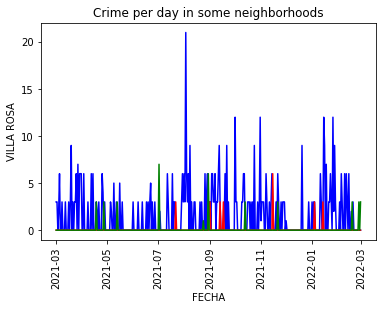

In [ ]:
#Corrective actions per day for some neighborhoods
sns.lineplot(x='FECHA',
             y='VILLA ROSA',
             data = daily_corrective_neighborhood_series[-365:],
             color='blue')
sns.lineplot(x='FECHA',
             y='13 DE JUNIO',
             data = daily_corrective_neighborhood_series[-365:],
             color='red')
sns.lineplot(x='FECHA',
             y='12 DE OCTUBRE',
             data = daily_corrective_neighborhood_series[-365:],
             color='green')

plt.title('Crime per day in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#List of neighborhoods to build dict of aggregate function to apply(sum)
barrios = df_md['BARRIO'].unique() 
dict_agg = {barrio:'sum' for barrio in barrios}

#Group by year and week of year, applying aggregate to neighborhood colums.
weekly_corrective_neighborhood_series = daily_corrective_neighborhood_series.groupby(['ANO', 'SEMANA'], as_index=False).agg(dict_agg)
weekly_corrective_neighborhood_series

,ANO,SEMANA,LA AURORA,EL PRADO,CABECERA DEL LLANO,SOTOMAYOR,ANTONIA SANTOS CENTRO,LA CONCORDIA,COLORADOS,EL PABLÓN,...,LAURELES I,HACIENDA SAN JUAN,SAN EXPEDITO,DELICIAS BAJAS,VILLA SARA,VILLA FLOR,ALTOS DEL CACIQUE,BARRIO NUEVO,LOS ANAYA,CHITOTA
0,2017,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,6,11.0,0.0,10.0,3.0,3.0,20.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,7,0.0,1.0,3.0,8.0,9.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,8,0.0,0.0,9.0,10.0,12.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,9,0.0,2.0,5.0,2.0,12.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022,5,5.0,3.0,35.0,9.0,29.0,12.0,27.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
262,2022,6,7.0,0.0,34.0,16.0,19.0,15.0,26.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263,2022,7,1.0,0.0,34.0,15.0,36.0,32.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,2022,8,38.0,10.0,56.0,32.0,54.0,65.0,27.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

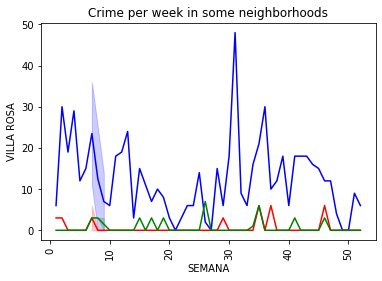

In [ ]:
#Corrective actions per week for some neighborhoods
sns.lineplot(x='SEMANA',
             y='VILLA ROSA',
             data = weekly_corrective_neighborhood_series[-55:],
             color='blue')
sns.lineplot(x='SEMANA',
             y='13 DE JUNIO',
             data = weekly_corrective_neighborhood_series[-55:],
             color='red')
sns.lineplot(x='SEMANA',
             y='12 DE OCTUBRE',
             data = weekly_corrective_neighborhood_series[-55:],
             color='green')

plt.title('Crime per week in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#Group by year and week of year, applying aggregate to neighborhood colums.
monthly_corrective_neighborhood_series = daily_corrective_neighborhood_series.groupby(['ANO', 'MES'], as_index=False).agg(dict_agg)
monthly_corrective_neighborhood_series

,ANO,MES,LA AURORA,EL PRADO,CABECERA DEL LLANO,SOTOMAYOR,ANTONIA SANTOS CENTRO,LA CONCORDIA,COLORADOS,EL PABLÓN,...,LAURELES I,HACIENDA SAN JUAN,SAN EXPEDITO,DELICIAS BAJAS,VILLA SARA,VILLA FLOR,ALTOS DEL CACIQUE,BARRIO NUEVO,LOS ANAYA,CHITOTA
0,2017,2,11.0,1.0,22.0,21.0,30.0,36.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017,3,6.0,3.0,32.0,6.0,103.0,21.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017,4,2.0,12.0,51.0,12.0,54.0,22.0,16.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,5,21.0,4.0,49.0,47.0,154.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,6,28.0,17.0,74.0,37.0,188.0,13.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021,10,31.0,3.0,96.0,30.0,51.0,47.0,55.0,9.0,...,0.0,0.0,0.0,3.0,9.0,0.0,0.0,3.0,0.0,0.0
57,2021,11,28.0,12.0,130.0,37.0,134.0,101.0,120.0,50.0,...,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0
58,2021,12,20.0,3.0,123.0,37.0,44.0,65.0,80.0,12.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0
59,2022,1,57.0,13.0,144.0,67.0,128.0,88.0,117.0,15.0,...,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

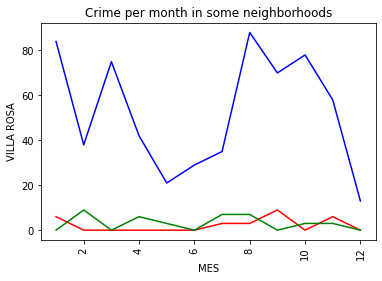

In [ ]:
#Corrective actions per week for some neighborhoods
sns.lineplot(x='MES',
             y='VILLA ROSA',
             data = monthly_corrective_neighborhood_series[-12:],
             color='blue')
sns.lineplot(x='MES',
             y='13 DE JUNIO',
             data = monthly_corrective_neighborhood_series[-12:],
             color='red')
sns.lineplot(x='MES',
             y='12 DE OCTUBRE',
             data = monthly_corrective_neighborhood_series[-12:],
             color='green')

plt.title('Crime per month in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#Save dataframes in CSV files
daily_corrective_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_corrective_neighborhood_series.csv')
weekly_corrective_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_corrective_neighborhood_series.csv')
monthly_corrective_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_corrective_neighborhood_series.csv')


#### **Corrective actions grouped by week**

In [ ]:
weekly_corrective_series = daily_corrective_series.groupby(["ANO", "SEMANA",])['CANTIDAD'].sum().reset_index().sort_values(["ANO","SEMANA", ])
weekly_corrective_series

,ANO,SEMANA,CANTIDAD
0,2017,5,1.0
1,2017,6,265.0
2,2017,7,290.0
3,2017,8,233.0
4,2017,9,150.0
...,...,...,...
261,2022,5,681.0
262,2022,6,597.0
263,2022,7,737.0
264,2022,8,1093.0


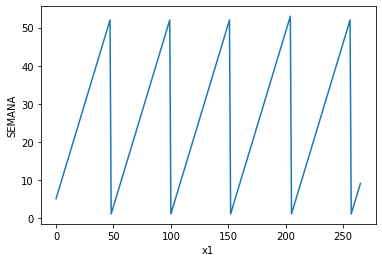

In [ ]:
temp_df = weekly_corrective_series
temp_df["x1"] = weekly_corrective_series.index


sns.lineplot(x='x1',
             y='SEMANA',
             data = temp_df[:])


#### **Corrective actions grouped by month**

In [ ]:
monthly_corrective_series = daily_corrective_series.groupby(["ANO", "MES"])['CANTIDAD'].sum().reset_index()
monthly_corrective_series

,ANO,MES,CANTIDAD
0,2017,2,822.0
1,2017,3,683.0
2,2017,4,1004.0
3,2017,5,1071.0
4,2017,6,1131.0
...,...,...,...
56,2021,10,2546.0
57,2021,11,3104.0
58,2021,12,2312.0
59,2022,1,3201.0


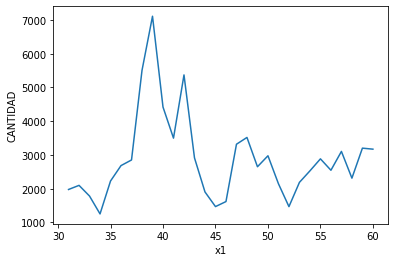

In [ ]:
temp_df = monthly_corrective_series
temp_df["x1"] = monthly_corrective_series.index

sns.lineplot(x='x1',
             y='CANTIDAD',
             data = temp_df[-30:])

In [ ]:
#Save datasets for model
daily_corrective_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_corrective_series.csv')
daily_corrective_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_corrective_basic_series.csv')
weekly_corrective_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_corrective_series.csv')
weekly_corrective_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_corrective_basic_series.csv')
monthly_corrective_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_corrective_series.csv')
monthly_corrective_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_corrective_basic_series.csv')

### **Crimes dataset for time series**

#### **Daily crime events**

First lets create a daily crimes events dataset

In [4]:
crimes_bucaramanga = pd.read_csv('/content/drive/MyDrive/Team 111 DS4A - Project/Data/Delitos_en_Bucaramanga_enero_2010_a_diciembre_de_2021.csv', sep = ';')
crimes_bucaramanga

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,...,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA,BARRIO_VULNERABLE
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170.557.382,-73.135.108,URBANA,14. Morrorico,2010,01. Enero,1,...,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE,Yes
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120.645.358,-7.312.605,URBANA,05. García Rovira,2010,01. Enero,1,...,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE,No
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120.645.358,-7.312.605,URBANA,05. García Rovira,2010,01. Enero,1,...,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE,No
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,715.135.927,-73.145.704.583,URBANA,03. San Francisco,2010,01. Enero,1,...,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,CASADO,MASCULINO,A PIE,A PIE,Yes
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.170.557.382,-73.135.108,URBANA,04. Occidental,2010,01. Enero,1,...,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135071,135072,SIN EMPLEO DE ARMAS,CABECERA DEL LLANO,NaN,NaN,NO REPORTA,12. Cabecera del Llano,2021,12. Diciembre,31,...,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,25,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,PASAJERO MOTOCICLETA,No
135072,135073,ARMA DE FUEGO,JARDINES DE COAVICONSA,NaN,NaN,NO REPORTA,11. Sur,2021,12. Diciembre,31,...,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,21,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,CONDUCTOR MOTOCICLETA,No
135073,135074,ARMA DE FUEGO,PROVENZA,NaN,NaN,NO REPORTA,10. Provenza,2021,12. Diciembre,31,...,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,25,04. Jovenes,NO REPORTA,NO REPORTA,A PIE,CONDUCTOR MOTOCICLETA,No
135074,135075,ARMA BLANCA / CORTOPUNZANTE,TOLEDO PLATA,NaN,NaN,NO REPORTA,11. Sur,2021,12. Diciembre,31,...,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,47,05. Adultez,NO REPORTA,NO REPORTA,A PIE,A PIE,No


In [5]:
### Create date of the crime
## Create month number
# Get first two characters in "MES" variable
crimes_bucaramanga['MES'] = crimes_bucaramanga['MES'].str.slice(stop = 2)
## Adjust day
# Convert daty to string
crimes_bucaramanga['DIA'] = crimes_bucaramanga['DIA'].astype('str') 
crimes_bucaramanga['DIA'] = np.where(crimes_bucaramanga['DIA'].str.len() == 1, '0'+ crimes_bucaramanga['DIA'], crimes_bucaramanga['DIA'])
## Concatenate year, month and day
year_month_day = ['ANO', 'MES', 'DIA']
crimes_bucaramanga['FECHA'] = pd.to_datetime(crimes_bucaramanga[year_month_day].apply(lambda row: '-'.join(row.values.astype(str)), axis=1))
crimes_bucaramanga['BARRIOS_HECHO'] = crimes_bucaramanga['BARRIOS_HECHO'].str.upper()

In [6]:
daily_crimes = crimes_bucaramanga.groupby(['FECHA'])['ORDEN'].count().reset_index().sort_values(['FECHA'], ascending = True)
daily_crimes.rename(columns = {'ORDEN':'CANTIDAD'}, inplace = True)
daily_crimes

,FECHA,CANTIDAD
0,2010-01-01,44
1,2010-01-02,13
2,2010-01-03,18
3,2010-01-04,13
4,2010-01-05,24
...,...,...
4373,2021-12-27,16
4374,2021-12-28,17
4375,2021-12-29,17
4376,2021-12-30,20


In [ ]:
daily_crime_series = pd.DataFrame()
daily_crime_series['FECHA'] = pd.date_range(start=daily_crimes['FECHA'].min(), end=daily_crimes['FECHA'].max())
daily_crime_series['ANO'] = daily_crime_series['FECHA'].dt.year
daily_crime_series['MES'] = daily_crime_series['FECHA'].dt.month
daily_crime_series['SEMANA'] = daily_crime_series['FECHA'].dt.isocalendar().week
daily_crime_series['DIA_SEMANA'] = daily_crime_series['FECHA'].dt.dayofweek
daily_crime_series['DIA_MES'] = daily_crime_series['FECHA'].dt.isocalendar().day

daily_crime_series = daily_crime_series.merge(daily_crimes, on='FECHA', how='left').fillna(0)
daily_crime_series

,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,CANTIDAD
0,2010-01-01,2010,1,53,4,5,44.0
1,2010-01-02,2010,1,53,5,6,13.0
2,2010-01-03,2010,1,53,6,7,18.0
3,2010-01-04,2010,1,1,0,1,13.0
4,2010-01-05,2010,1,1,1,2,24.0
...,...,...,...,...,...,...,...
4378,2021-12-27,2021,12,52,0,1,16.0
4379,2021-12-28,2021,12,52,1,2,17.0
4380,2021-12-29,2021,12,52,2,3,17.0
4381,2021-12-30,2021,12,52,3,4,20.0


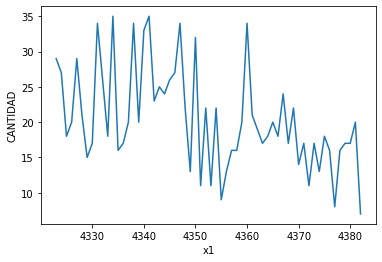

In [ ]:
import seaborn as sns

#plot a sample of daily data series
temp_df = daily_crime_series
temp_df["x1"] = daily_crime_series.index
sns.lineplot(x='x1',
             y='CANTIDAD',
             data = temp_df[-60:])

#### **Crimes per neighborhood grouped by day, week and month**

In [7]:
crimes_bucaramanga = crimes_bucaramanga.rename(columns = {'BARRIOS_HECHO': 'BARRIO'})
### Format neighborhoods
## To upper
crimes_bucaramanga['BARRIO'] = crimes_bucaramanga['BARRIO'].str.upper()

In [11]:
len(crimes_bucaramanga['BARRIO'].unique())
len(crimes_bucaramanga['BARRIO'].unique())

484

In [12]:
daily_crimes_neighborhood = crimes_bucaramanga.pivot_table(index=["FECHA"], columns="BARRIO", values="ANO", aggfunc="count").reset_index().sort_values('FECHA').fillna(0)
daily_crimes_neighborhood.head()

BARRIO,FECHA,12 DE OCTUBRE,13 DE JUNIO,20 DE JULIO,23 DE JUNIO,5 DE ENERO,ACACIAS,AFRICA,ALARCON,ALBANIA,...,VILLABEL,VILLAS DE SAN FRANCISCO,VILLAS DE SAN IGNACIO,VILLAS DEL NOGAL,VRDA ABEJAS,VRDA CAPILLA,VRDA JABONCILLO,VRDA SAN ISIDRO,ZARABANDA,ZONA INDUSTRIAL
0,2010-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
daily_crimes_neighborhood_series = pd.DataFrame()
daily_crimes_neighborhood_series['FECHA'] = pd.date_range(start=daily_crimes_neighborhood['FECHA'].min(), end=daily_crimes_neighborhood['FECHA'].max())
daily_crimes_neighborhood_series['ANO'] = daily_crimes_neighborhood_series['FECHA'].dt.isocalendar().year
daily_crimes_neighborhood_series['MES'] = daily_crimes_neighborhood_series['FECHA'].dt.month
daily_crimes_neighborhood_series['SEMANA'] = daily_crimes_neighborhood_series['FECHA'].dt.isocalendar().week
daily_crimes_neighborhood_series['DIA_SEMANA'] = daily_crimes_neighborhood_series['FECHA'].dt.dayofweek
daily_crimes_neighborhood_series['DIA_MES'] = daily_crimes_neighborhood_series['FECHA'].dt.day

daily_crimes_neighborhood_series = daily_crimes_neighborhood_series.merge(daily_crimes_neighborhood, on='FECHA', how='left').fillna(0)
daily_crimes_neighborhood_series

,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,12 DE OCTUBRE,13 DE JUNIO,20 DE JULIO,23 DE JUNIO,...,VILLABEL,VILLAS DE SAN FRANCISCO,VILLAS DE SAN IGNACIO,VILLAS DEL NOGAL,VRDA ABEJAS,VRDA CAPILLA,VRDA JABONCILLO,VRDA SAN ISIDRO,ZARABANDA,ZONA INDUSTRIAL
0,2010-01-01,2009,1,53,4,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-02,2009,1,53,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-03,2009,1,53,6,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-04,2010,1,1,0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-05,2010,1,1,1,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,2021,12,52,0,27,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4379,2021-12-28,2021,12,52,1,28,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4380,2021-12-29,2021,12,52,2,29,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4381,2021-12-30,2021,12,52,3,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([737791., 737850., 737911., 737972., 738034., 738095., 738156.]),
 <a list of 7 Text major ticklabel objects>)

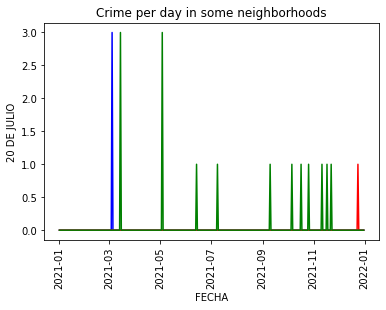

In [ ]:
#Corrective actions per day for some neighborhoods
sns.lineplot(x='FECHA',
             y='20 DE JULIO',
             data = daily_crimes_neighborhood_series[-365:],
             color='blue')
sns.lineplot(x='FECHA',
             y='13 DE JUNIO',
             data = daily_crimes_neighborhood_series[-365:],
             color='red')
sns.lineplot(x='FECHA',
             y='12 DE OCTUBRE',
             data = daily_crimes_neighborhood_series[-365:],
             color='green')

plt.title('Crime per day in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#List of neighborhoods to build dict of aggregate function to apply(sum)
barrios = crimes_bucaramanga['BARRIO'].unique() 
dict_agg = {barrio:'sum' for barrio in barrios}

#Group by year and week of year, applying aggregate to neighborhood colums.
weekly_crimes_neighborhood_series = daily_crimes_neighborhood_series.groupby(['ANO', 'SEMANA'], as_index=False).agg(dict_agg)
weekly_crimes_neighborhood_series

,ANO,SEMANA,BUENOS AIRES,CAMPO HERMOSO,COMUNEROS,GIRARDOT,LOS ANGELES,NARIÑO,PROVENZA,SOTOMAYOR,...,GRANJAS REGAN,VILLA DEL NOGAL,DELICIAS,COLSEGUROS NORTE,CONQUISTADORES,MANZANARES,BALCONCITOS,BRISAS DEL MUTIS,VILLA MARIA III (BAJA),CAMPESTRE
0,2009,53,2.0,2.0,1.0,3.0,2.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,1.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,2,0.0,2.0,0.0,4.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,3,0.0,2.0,1.0,3.0,1.0,0.0,6.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,4,0.0,3.0,0.0,4.0,0.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2021,48,1.0,0.0,3.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
623,2021,49,0.0,6.0,4.0,1.0,0.0,0.0,5.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
624,2021,50,1.0,0.0,2.0,2.0,0.0,0.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625,2021,51,1.0,2.0,1.0,0.0,0.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

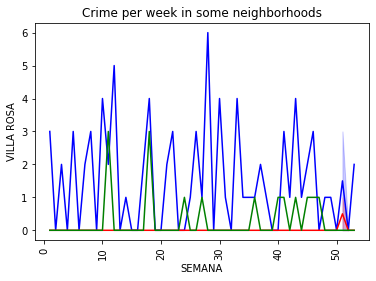

In [ ]:
#Corrective actions per week for some neighborhoods
sns.lineplot(x='SEMANA',
             y='VILLA ROSA',
             data = weekly_crimes_neighborhood_series[-55:],
             color='blue')
sns.lineplot(x='SEMANA',
             y='13 DE JUNIO',
             data = weekly_crimes_neighborhood_series[-55:],
             color='red')
sns.lineplot(x='SEMANA',
             y='12 DE OCTUBRE',
             data = weekly_crimes_neighborhood_series[-55:],
             color='green')

plt.title('Crime per week in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#Group by year and week of year, applying aggregate to neighborhood colums.
monthly_crimes_neighborhood_series = daily_crimes_neighborhood_series.groupby(['ANO', 'MES'], as_index=False).agg(dict_agg)
monthly_crimes_neighborhood_series

,ANO,MES,BUENOS AIRES,CAMPO HERMOSO,COMUNEROS,GIRARDOT,LOS ANGELES,NARIÑO,PROVENZA,SOTOMAYOR,...,GRANJAS REGAN,VILLA DEL NOGAL,DELICIAS,COLSEGUROS NORTE,CONQUISTADORES,MANZANARES,BALCONCITOS,BRISAS DEL MUTIS,VILLA MARIA III (BAJA),CAMPESTRE
0,2009,1,2.0,2.0,1.0,3.0,2.0,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010,1,2.0,11.0,5.0,12.0,2.0,0.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,2,7.0,12.0,8.0,13.0,0.0,2.0,11.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010,3,1.0,9.0,8.0,7.0,1.0,1.0,17.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010,4,1.0,22.0,19.0,11.0,4.0,2.0,20.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2021,8,4.0,17.0,22.0,11.0,0.0,0.0,25.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141,2021,9,2.0,11.0,9.0,9.0,2.0,2.0,27.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
142,2021,10,5.0,16.0,20.0,12.0,0.0,0.0,18.0,18.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0
143,2021,11,7.0,9.0,13.0,13.0,2.0,2.0,14.0,6.0,...,0.0,0.0,3.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

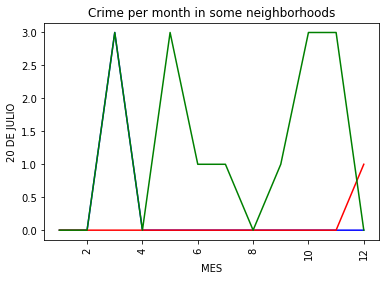

In [ ]:
#Corrective actions per week for some neighborhoods
sns.lineplot(x='MES',
             y='20 DE JULIO',
             data = monthly_crimes_neighborhood_series[-12:],
             color='blue')
sns.lineplot(x='MES',
             y='13 DE JUNIO',
             data = monthly_crimes_neighborhood_series[-12:],
             color='red')
sns.lineplot(x='MES',
             y='12 DE OCTUBRE',
             data = monthly_crimes_neighborhood_series[-12:],
             color='green')

plt.title('Crime per month in some neighborhoods')
plt.xticks(rotation = 90)

In [ ]:
#Save dataframes in CSV files
daily_crimes_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_crimes_neighborhood_series.csv')
weekly_crimes_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_crimes_neighborhood_series.csv')
monthly_crimes_neighborhood_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_crimes_neighborhood_series.csv')


#### **Crime actions grouped by week**
Also lets create a weekly and monthly crimes events dataset

In [ ]:
weekly_crime_series = daily_crime_series.groupby(["ANO", "MES", "SEMANA"])['CANTIDAD'].sum().reset_index()
weekly_crime_series

,ANO,MES,SEMANA,CANTIDAD
0,2010,1,1,134.0
1,2010,1,2,186.0
2,2010,1,3,193.0
3,2010,1,4,175.0
4,2010,1,53,75.0
...,...,...,...,...
744,2021,12,48,77.0
745,2021,12,49,143.0
746,2021,12,50,133.0
747,2021,12,51,100.0


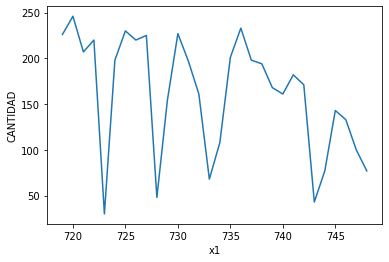

In [ ]:
temp_df = weekly_crime_series
temp_df["x1"] = weekly_crime_series.index

sns.lineplot(x='x1',
             y='CANTIDAD',
             data = temp_df[-30:])

#### **Crime actions grouped by month**

In [ ]:
monthly_crime_series = daily_crime_series.groupby(["ANO", "MES"])['CANTIDAD'].sum().reset_index()
monthly_crime_series

,ANO,MES,CANTIDAD
0,2010,1,763.0
1,2010,2,570.0
2,2010,3,637.0
3,2010,4,661.0
4,2010,5,693.0
...,...,...,...
139,2021,8,951.0
140,2021,9,807.0
141,2021,10,934.0
142,2021,11,725.0


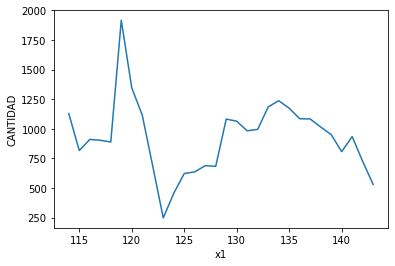

In [ ]:
temp_df = monthly_crime_series
temp_df["x1"] = monthly_crime_series.index
sns.lineplot(x='x1',
             y='CANTIDAD',
             data = temp_df[-30:])

In [ ]:
monthly_crime_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_crime_series.csv')
monthly_crime_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_crime_basic_series.csv')
weekly_crime_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_crime_series.csv')
weekly_crime_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_crime_basic_series.csv')
daily_crime_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_crime_series.csv')
daily_crime_series["CANTIDAD"].reset_index().to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_crime_basic_series.csv')

### **Combined dataset series**

In [ ]:
combined_series = daily_corrective_series.merge(daily_crime_series, on="FECHA", how="left").dropna(how='any')
combined_series.rename(columns = {'CANTIDAD_x':'CANTIDAD_CORRECTIVAS', 'CANTIDAD_y':'CANTIDAD_CRIMENES'}, inplace = True)
combined_series

,FECHA,ANO_x,MES_x,SEMANA_x,DIA_SEMANA_x,DIA_MES_x,CANTIDAD_CORRECTIVAS,ANO_y,MES_y,SEMANA_y,DIA_SEMANA_y,DIA_MES_y,CANTIDAD_CRIMENES,x1
0,2017-02-05,2017,2,5,6,5,1.0,2017.0,2.0,5,6.0,7,37.0,2592.0
1,2017-02-06,2017,2,6,0,6,0.0,2017.0,2.0,6,0.0,1,40.0,2593.0
2,2017-02-07,2017,2,6,1,7,9.0,2017.0,2.0,6,1.0,2,40.0,2594.0
3,2017-02-08,2017,2,6,2,8,38.0,2017.0,2.0,6,2.0,3,40.0,2595.0
4,2017-02-09,2017,2,6,3,9,61.0,2017.0,2.0,6,3.0,4,42.0,2596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786,2021-12-27,2021,12,52,0,27,33.0,2021.0,12.0,52,0.0,1,16.0,4378.0
1787,2021-12-28,2021,12,52,1,28,40.0,2021.0,12.0,52,1.0,2,17.0,4379.0
1788,2021-12-29,2021,12,52,2,29,43.0,2021.0,12.0,52,2.0,3,17.0,4380.0
1789,2021-12-30,2021,12,52,3,30,49.0,2021.0,12.0,52,3.0,4,20.0,4381.0


In [ ]:
daily_combined_series = combined_series[["CANTIDAD_CORRECTIVAS", "CANTIDAD_CRIMENES"]]
weekly_combined_series = combined_series.groupby(["ANO_x", "MES_x", "SEMANA_x"])[['CANTIDAD_CORRECTIVAS', 'CANTIDAD_CRIMENES']].sum().reset_index()[["CANTIDAD_CORRECTIVAS", "CANTIDAD_CRIMENES"]]
monthly_combined_series = combined_series.groupby(["ANO_x", "MES_x"])[['CANTIDAD_CORRECTIVAS', 'CANTIDAD_CRIMENES']].sum().reset_index()[["CANTIDAD_CORRECTIVAS", "CANTIDAD_CRIMENES"]]

In [ ]:
monthly_combined_series.head()

,CANTIDAD_CORRECTIVAS,CANTIDAD_CRIMENES
0,822.0,858.0
1,683.0,968.0
2,1004.0,950.0
3,1071.0,1119.0
4,1131.0,948.0


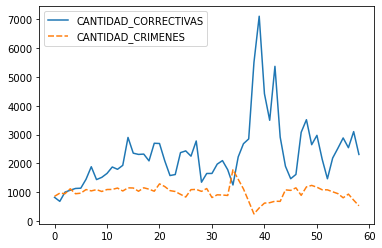

In [ ]:
sns.lineplot(data=monthly_combined_series)

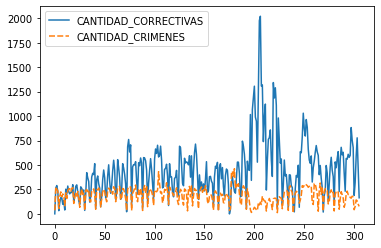

In [ ]:
sns.lineplot(data=weekly_combined_series)

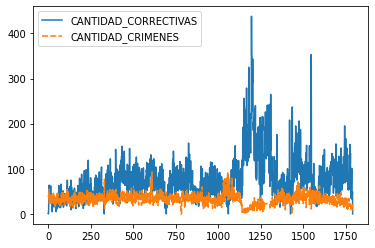

In [ ]:
sns.lineplot(data=daily_combined_series)

In [ ]:
monthly_combined_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/monthly_combined_series.csv')
weekly_combined_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_combined_series.csv')
daily_combined_series.to_csv(r'/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_combined_series.csv')
